<a href="https://colab.research.google.com/github/Abebaw1984/gdal/blob/master/USGS_Daily_Streamflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download peak flow data for gauge USGS 05464500 Cedar River at Cedar Rapids, IA (http://waterdata.usgs.gov/nwis/uv?05464500) from 1903 to 2016 (tip: use the “Annual Data: Peak Streamflow” menu). **
## Basic Entrance Background Exam  Multiscale Hydrology Research Group         PI: Prof. Ricardo Mantilla, PhD

## 1. Import Packages

In [ ]:
import urllib.parse
import urllib.request
import os
import pandas as pd
import numpy as np

## 2. Accessing USGS Peak Streamflow Data

### 2.1. Enter the required Info

In [ ]:
# Assume the month and the date of the data range to be downloaded is:Start date January 1/1903 and End Date December 31/2016.

In [ ]:
station_number = input("What is the USGS Station ID?\t")
start_date = input("Start Date (YYYY-MM-DD):\t")
end_date = input("End Date (YYYY-MM-DD):\t")
folder = os.getcwd()

What is the USGS Station ID?	05464500
Start Date (YYYY-MM-DD):	1903-01-01
End Date (YYYY-MM-DD):	2016-12-31


### 2.2. Create a inique URL

In [ ]:
section1 = 'https://nwis.waterdata.usgs.gov/nwis/peak?site_no='
section2 = '&agency_cd=USGS'
section3 = '&format=rdb'
section4 = '&site_tp_cd=ST'   # valid but optional parameter

link = section1 + station_number + section2 + section3 + section4
print("Click here to see the generated USGS link:\n", link)

Click here to see the generated USGS link:
 https://nwis.waterdata.usgs.gov/nwis/peak?site_no=05464500&agency_cd=USGS&format=rdb&site_tp_cd=ST


### 2.3. Download and process daily streamflow

In [ ]:
USGS_page = urllib.request.urlopen(link)
downloaded_data = USGS_page.read()

In [ ]:
type(downloaded_data)

bytes

In [ ]:
str_data = downloaded_data.decode()
type(str_data)
str_data

"#\r\n# U.S. Geological Survey\r\n# National Water Information System\r\n# Retrieved: 2025-12-15 04:07:33 EST\r\n#\r\n# ---------------------------------- WARNING ----------------------------------------\r\n# Some of the data that you have obtained from this U.S. Geological Survey database\r\n# may not have received Director's approval. Any such data values are qualified\r\n# as provisional and are subject to revision. Provisional data are released on the\r\n# condition that neither the USGS nor the United States Government may be held liable\r\n# for any damages resulting from its use.\r\n#\r\n# More data may be available offline.\r\n# For more information on these data,  contact  USGS Water Data Inquiries.\r\n# This file contains the annual peak streamflow data.\r\n#\r\n# This information includes the following fields:\r\n#\r\n#  agency_cd     Agency Code\r\n#  site_no       USGS station number\r\n#  peak_dt       Date of peak streamflow (format YYYY-MM-DD)\r\n#  peak_tm       Time o

In [ ]:
f_str_data = str_data.split('\n')
#f_str_data

In [ ]:
station_name = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("#    USGS"):
        station_name=f_str_data[line][3:]
print(station_name)

In [ ]:
date_flow = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_number  + '.txt', 'wb') as text:
        text.write(date_flow)

In [ ]:
filename = folder+'/USGS_Data_for_' + station_number  + '.txt'
columns = ['Date','Discharge (cfs)']
df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])
df=df.set_index(['Date'])
df['Discharge (cfs)']=pd.to_numeric(df['Discharge (cfs)'], errors='coerce')
df.tail()

/tmp/ipython-input-385464678.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])


,Discharge (cfs)
Date,
2020-06-25,NaN
2021-09-03,NaN
2022-05-04,NaN
2023-03-04,NaN
2024-06-29,NaN


### 2.4. Create hydrograph

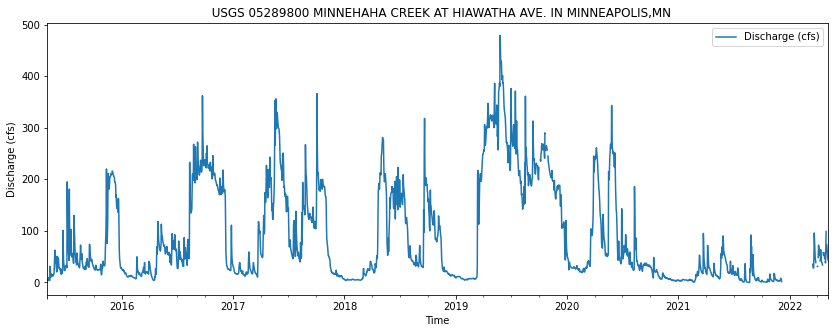

In [ ]:
df.plot(figsize=(14,5), title= station_name, xlabel="Time", ylabel="Discharge (cfs)");